<a href="https://colab.research.google.com/github/aljebraschool/Deep_Learning_Fundamental_Projects/blob/main/Loading_Image_Data_(Exercises).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Image Data

So far we've been working with fairly artificial datasets that you wouldn't typically be using in real projects. Instead, you'll likely be dealing with full-sized images like you'd get from smart phone cameras. In this notebook, we'll look at how to load images and use them to train neural networks.

We'll be using a [dataset of cat and dog photos](https://www.kaggle.com/c/dogs-vs-cats) available from Kaggle. Here are a couple example images:

<img src='assets/dog_cat.png'>

We'll use this dataset to train a neural network that can differentiate between cats and dogs. These days it doesn't seem like a big accomplishment, but five years ago it was a serious challenge for computer vision systems.

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/cat_and_dog_data.zip -d /content/


Archive:  /content/drive/MyDrive/cat_and_dog_data.zip
replace /content/Cat_Dog_data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content

Cat_Dog_data  drive  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

In [ ]:
data_dir = '/content/Cat_Dog_data'


transform = transforms.Compose([transforms.Resize(255),
                               transforms.CenterCrop(224),
                               transforms.ToTensor()])# TODO: compose transforms here

dataset = datasets.ImageFolder(data_dir, transform = transform)  # TODO: create the ImageFolder
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 64, shuffle = True)  # TODO: use the ImageFolder dataset to create the DataLoader

If you loaded the data correctly, you should see something like this (your image will be different):

<img src='assets/cat_cropped.png' width=244>

In [ ]:
data_dir = '/content/Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                        ])

test_transforms = transforms.Compose([transforms.Resize(260),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor()])


# # Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.axis('off')
    ax.imshow(image)

    if title:
        ax.set_title(title)

    return ax



In [ ]:
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)


NameError: ignored

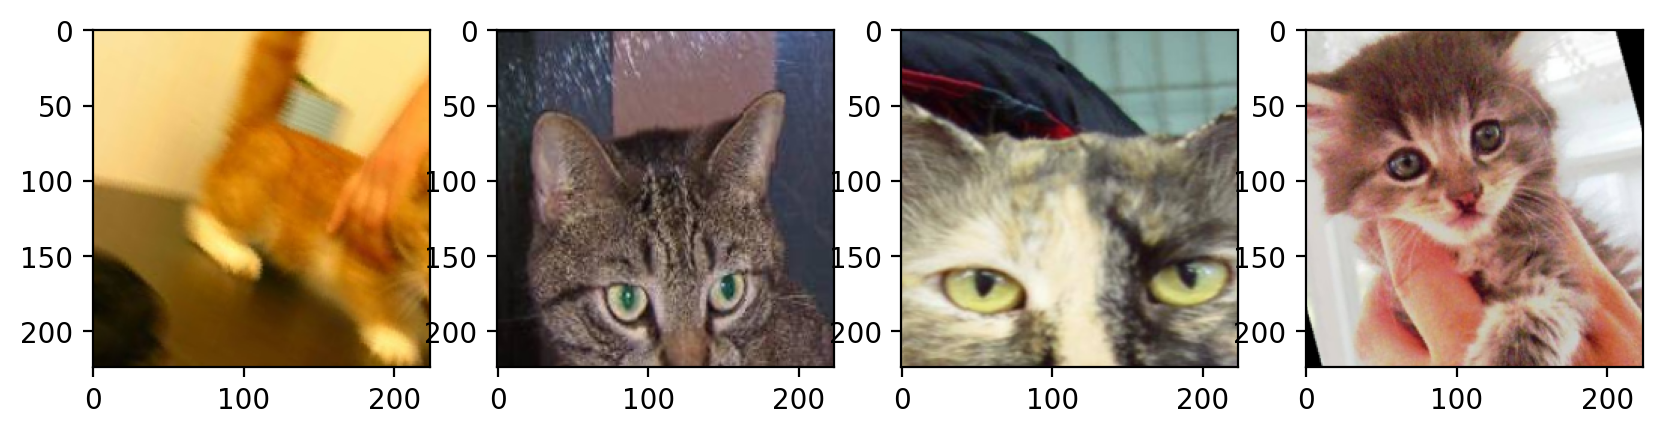

In [ ]:
#change this to the trainloader or testloader

data_iter = iter(trainloader)
images, labels = next(data_iter)

fig, axes = plt.subplots(figsize=(10, 4), ncols=4, xlim = [])
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

plt.show()


In [ ]:
images.size()

torch.Size([32, 3, 224, 224])

At this point you should be able to load data for training and testing. Now, you should try building a network that can classify cats vs dogs. This is quite a bit more complicated than before with the MNIST and Fashion-MNIST datasets. To be honest, you probably won't get it to work with a fully-connected network, no matter how deep. These images have three color channels and at a higher resolution (so far you've seen 28x28 images which are tiny).

In the next part, I'll show you how to use a pre-trained network to build a model that can actually solve this problem.

In [ ]:
# Optional TODO: Attempt to build a network to classify cats vs dogs from this dataset